In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
from matplotlib_inline.backend_inline import set_matplotlib_formats
from importlib import reload
import get_probs
import neuron_selection
reload(get_probs)
reload(neuron_selection)
from get_probs import get_probs
from neuron_selection import select_neurons_per_layer

rcParams["figure.figsize"] = (8, 5)
rcParams["figure.dpi"] = 100
set_matplotlib_formats("retina")
plt.style.use("seaborn")

In [41]:
output = np.load("output/output.npz")

X = output["activations"]
y = output["targets"]

samples = X.reshape(y.shape[0], -1)
pos_mask = (y == 1).squeeze()
neg_mask = (y == 0).squeeze()
pos_samples = samples[pos_mask].T
neg_samples = samples[neg_mask].T

In [49]:
output_dict = get_probs('data/debug.csv', n_neurons=1000)

5it [01:01, 12.22s/it]


In [33]:
df = pd.read_csv("data/debug.csv")
pos_mask = df.label == 1
neg_mask = df.label == 0

In [34]:
def get_average_likelihood(probs, mask):
    likelihoods = [np.mean(np.exp(sequence)) for sequence in probs[mask]]
    return np.mean(likelihoods)

In [35]:
for name, probs in output_dict.items():
    if name.endswith('likelihood'):
        print(name, get_average_likelihood(np.array(probs, dtype="object"), neg_mask))

masked_likelihood 0.0726733137022029
no_masked_likelihood 0.18996315675940867
rand_masked_likelihood 0.005538799709454686


In [37]:
select_neurons_per_layer("output/output.npz", n_neurons=2, method="correlation")

{31: [{'neuron': 130,
   'positive': 9.854576110839844,
   'negative': -17.321693420410156},
  {'neuron': 1083,
   'positive': 8.443896293640137,
   'negative': -26.844921112060547}]}

In [40]:
select_neurons_per_layer("output/output.npz", n_neurons=2, method="random")

{5: [{'neuron': 1049,
   'positive': -4.193837642669678,
   'negative': 2.0358705520629883}],
 45: [{'neuron': 211,
   'positive': -90.4220199584961,
   'negative': 25.0495548248291}]}

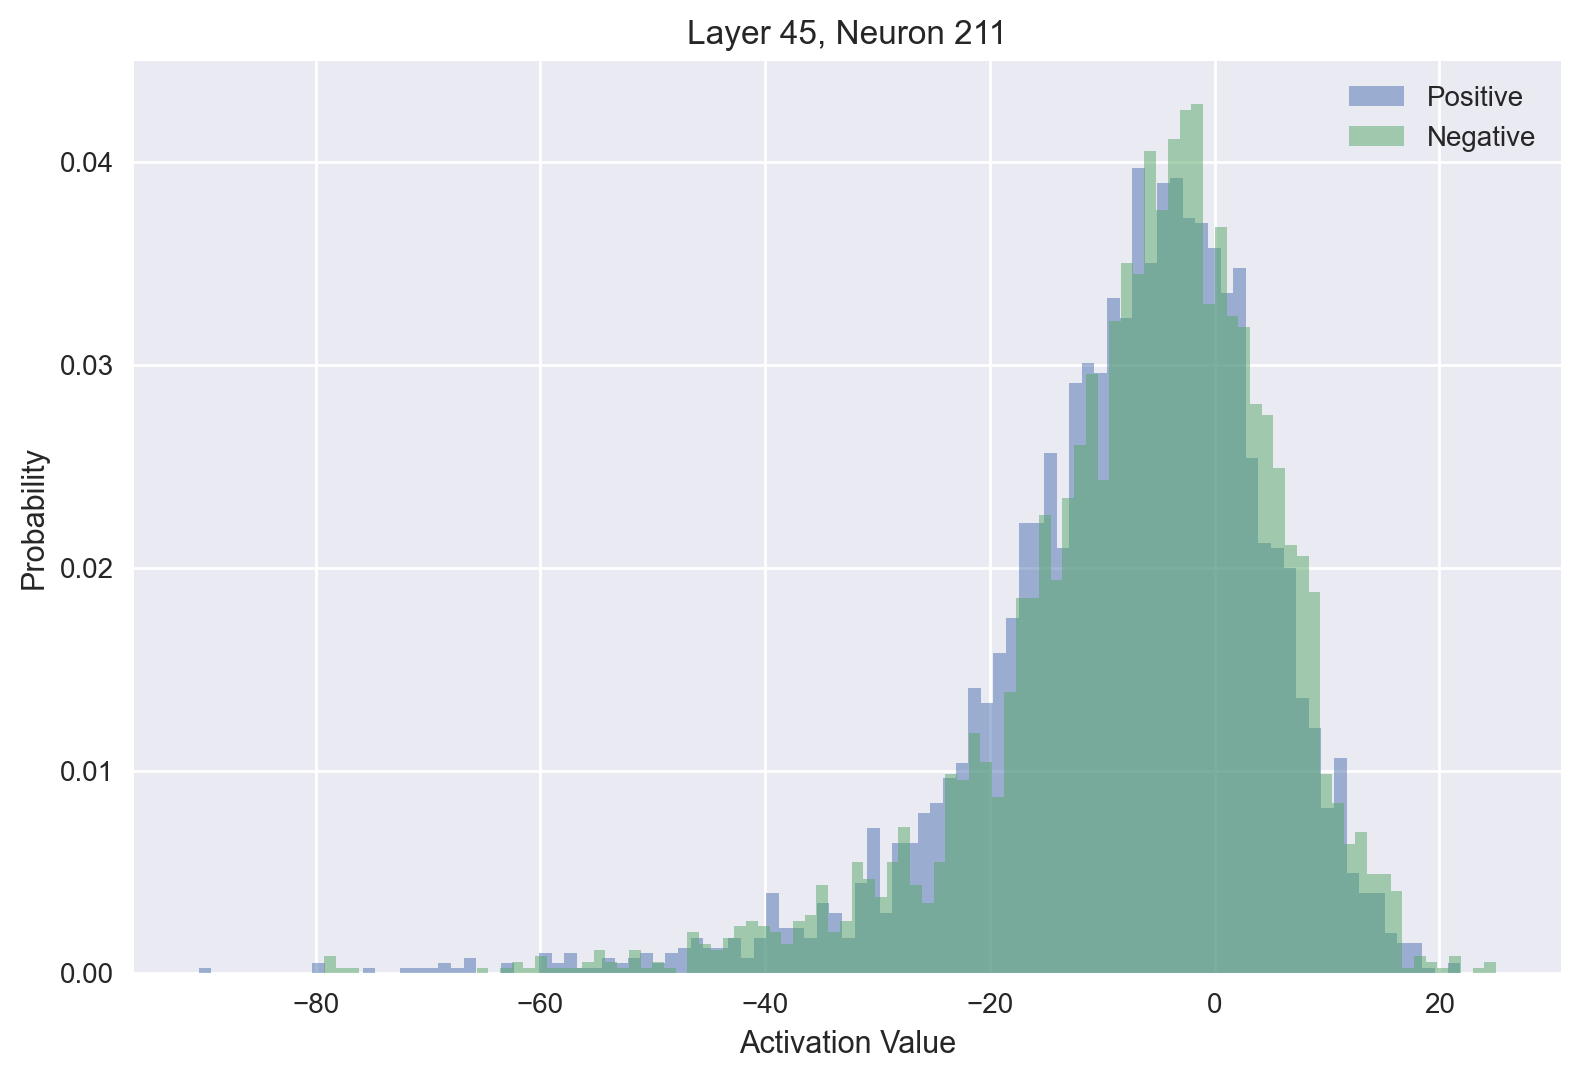

In [47]:
MODEL_SHAPE = (49, 1600)
layer = 45
neuron = 211
index = layer * 1600 + neuron

plt.hist(pos_samples[index], bins=100, alpha=0.5, density=True, label="Positive")
plt.hist(neg_samples[index], bins=100, alpha=0.5, density=True, label="Negative")
plt.title(f"Layer {layer}, Neuron {neuron}")
plt.legend()

plt.xlabel('Activation Value')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()